# Example 12.1: Clapeyron Equation

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Determine the enthalpy of vaporization for water at 100 kPa using:
* (a) the Clapeyron equation
* (b) the Clapeyron-Clausius equation
* (c) the steam tables

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from thermoJFM.templates.default import *
   
fluid = realfluid.Properties('Water')

p[1] = Quantity(100,'kPa')
x[1] = 0
states.fix(1,fluid)

p[2] = Quantity(125,'kPa')
x[2] = 0
states.fix(2,fluid)

p[3] = Quantity(75,'kPa')
x[3] = 0
states.fix(3,fluid)

p[4] = p[1]
x[4] = 1
states.fix(4,fluid)

states.display();

,T [°C],p [kPa],v [m³/kg],u [kJ/kg],h [kJ/kg],s [kJ/K/kg],x [],phase []
1,99.605929,100,0.001043,417.399595,417.503911,1.302758,0,twophase
2,105.965497,125,0.001048,444.222511,444.353540,1.374111,0,twophase
3,91.757999,75,0.001037,384.359647,384.437439,1.213174,0,twophase
4,99.605929,100,1.693928,2505.554911,2674.947677,7.358849,1,twophase


### (a) Clapeyron equation
The Clapeyron equation relates the enthalpy of vaporization to easily measureable properties, $T$, $p$, and $v$
$$ \left( \frac{\partial p}{\partial T} \right)_{sat} = \frac{h_{fg}}{T_{sat}v_{fg}}$$
This can be solved for the enthalpy
$$ h_{fg} = Tv_{fg}\left(\frac{\partial P}{\partial T}\right)_{sat} $$
The application of this equation depends on knowing the partial derivative of the pressure with respect to the temperature during phase change.  This can be visualized as the slope of the saturation curve on a $p$-$T$ diagram at the pressure of interest

In [4]:
v_fg = v[4]-v[1]

display.Calculations(locals());

<IPython.core.display.Latex object>

AttributeError: 'Line2D' object has no property 'ycoor'

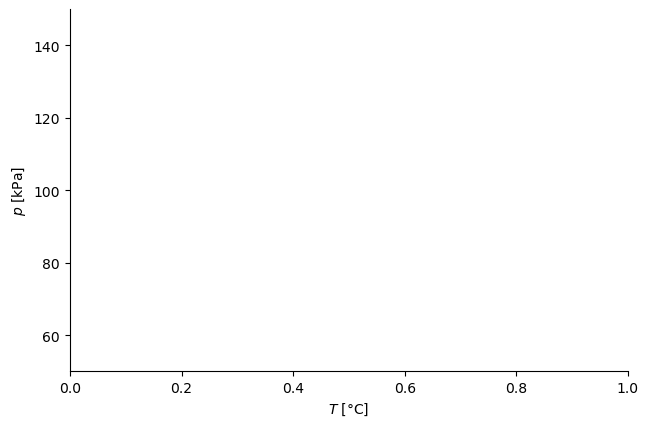

In [5]:
pT = fluid.property_diagram(x="T",y="p",saturation=False)
pT.ax.set_ylim(bottom=50,top=150)
# pT.ax.set_xlim(left=80,right=120)

# Label phases
pT.plot_iso_line("x",0,y_range=[50,150]*units('kPa'),label='saturated',ycoor=55,color='gray')
pT.text(0.1,.9,'liquid',axcoor=True)
pT.text(0.9,.1,'vapor',axcoor=True)

# Plot states
pT.plot_state(states[1],label_loc='north west',gridlines=True)
pT.plot_state(states[2],label_loc='north west')
pT.plot_state(states[3],label_loc='north west')


#### Forward Difference

In [4]:
dPdT_forward = (p[2]-p[1])/(T[2]-T[1])
h_fg_forward = T[1].to('K')*v_fg*dPdT_forward
h_fg_forward = h_fg_forward.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

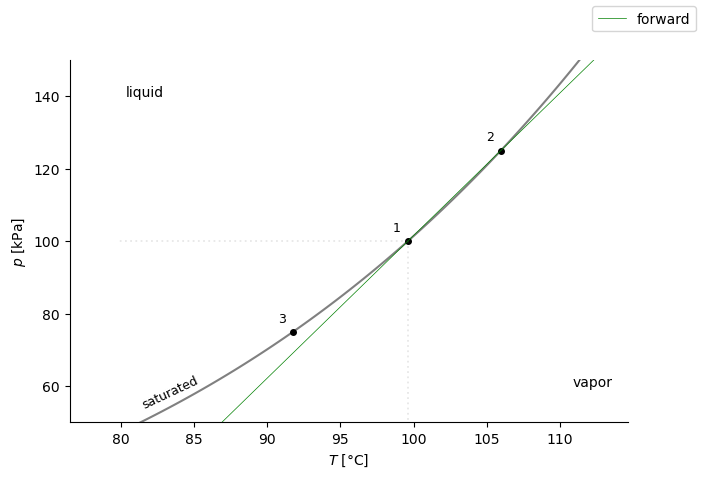

In [5]:
x = Quantity(pT.xlim,'degC')
y = dPdT_forward*(x-T[1]) + p[1]
pT.plot(x,y,color='green',linewidth=.5,label='forward')
pT.fig.legend()
pT.show()

#### Backward Difference

In [6]:
dPdT_backward = (p[1]-p[3])/(T[1]-T[3])
h_fg_backward = T[1].to('K')*v_fg*dPdT_backward
h_fg_backward = h_fg_backward.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

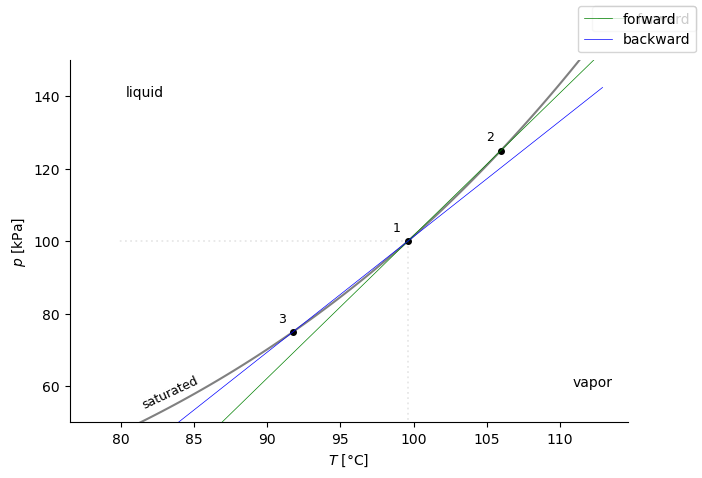

In [7]:
y = dPdT_backward*(x-T[1]) + p[1]
pT.ax.plot(x,y,color='blue',linewidth=.5,label='backward')
pT.fig.legend()
pT.show()

#### Central Difference

In [8]:
dPdT_central = (p[2]-p[3])/(T[2]-T[3])
h_fg_central = T[1].to('K')*v_fg*dPdT_central
h_fg_central = h_fg_central.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

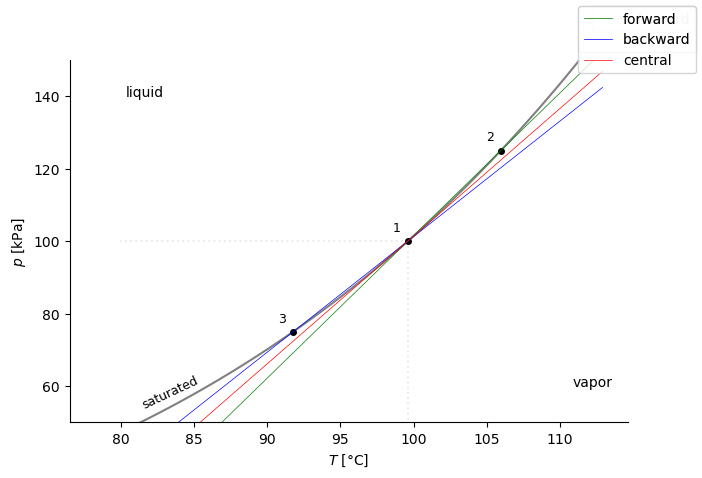

In [9]:
y = dPdT_central*(x-T[1]) + p[1]
pT.ax.plot(x,y,color='red',linewidth=.5,label='central')
pT.fig.legend()
pT.show()

### (b) Clapeyron-Clausius equation
$$\ln\left(\frac{p_B}{p_A}\right) = \frac{h_{fg}}{R}\left(\frac{1}{T_A}-\frac{1}{T_B}\right)$$

In [10]:
from math import log
R = water.R
h_fg = (R*log(p[3]/p[2]))/(1/T[2].to('K')-1/T[3].to('K'))
h_fg = h_fg.to('kJ/kg') # hide

display.Calculations(locals());

<IPython.core.display.Latex object>

### (c) Steam Tables

In [11]:
h_fg = h[4]-h[1]

display.Calculations(locals());

<IPython.core.display.Latex object>